In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 10.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 349kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.60MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
batch_size = 20

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#N, H,W, C
for plotting image dimension should be of form (H,W,C)

(3,6,2)

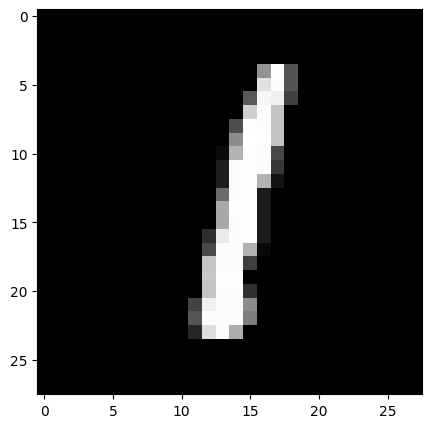

In [ ]:
dataiter = iter(train_loader)
images, labels = next(iter(train_loader))
images = images.numpy()
img = np.squeeze(images[0])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(28 * 28, encoding_dim) #Encoder layer
        self.fc2 = nn.Linear(encoding_dim, 28*28) #Decoder layer
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [ ]:
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [ ]:
criterion = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 100
for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss ))

Epoch: 1 tTraining Loss: 4.665638
Epoch: 2 tTraining Loss: 4.649163
Epoch: 3 tTraining Loss: 4.636105
Epoch: 4 tTraining Loss: 4.624675
Epoch: 5 tTraining Loss: 4.613915
Epoch: 6 tTraining Loss: 4.603303
Epoch: 7 tTraining Loss: 4.592441
Epoch: 8 tTraining Loss: 4.581012
Epoch: 9 tTraining Loss: 4.568751
Epoch: 10 tTraining Loss: 4.555421
Epoch: 11 tTraining Loss: 4.540797
Epoch: 12 tTraining Loss: 4.524657
Epoch: 13 tTraining Loss: 4.506770
Epoch: 14 tTraining Loss: 4.486894
Epoch: 15 tTraining Loss: 4.464773
Epoch: 16 tTraining Loss: 4.440130
Epoch: 17 tTraining Loss: 4.412673
Epoch: 18 tTraining Loss: 4.382098
Epoch: 19 tTraining Loss: 4.348087
Epoch: 20 tTraining Loss: 4.310318
Epoch: 21 tTraining Loss: 4.268468
Epoch: 22 tTraining Loss: 4.222221
Epoch: 23 tTraining Loss: 4.171277
Epoch: 24 tTraining Loss: 4.115364
Epoch: 25 tTraining Loss: 4.054246
Epoch: 26 tTraining Loss: 3.987736
Epoch: 27 tTraining Loss: 3.915712
Epoch: 28 tTraining Loss: 3.838129
Epoch: 29 tTraining Loss: 3.7

In [ ]:
images, labels = next(iter(test_loader))
images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()
output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)